In [76]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np
from zlib import crc32
import matplotlib.pyplot as plt


In [77]:
def load_housing_data():
    tarball_path = Path('datasets/housing.tgz')
    if not tarball_path.is_file():
        print("Not found try to download it")
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

In [78]:
housing = load_housing_data()

In [79]:
housing.head(n=10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [80]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [81]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [82]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

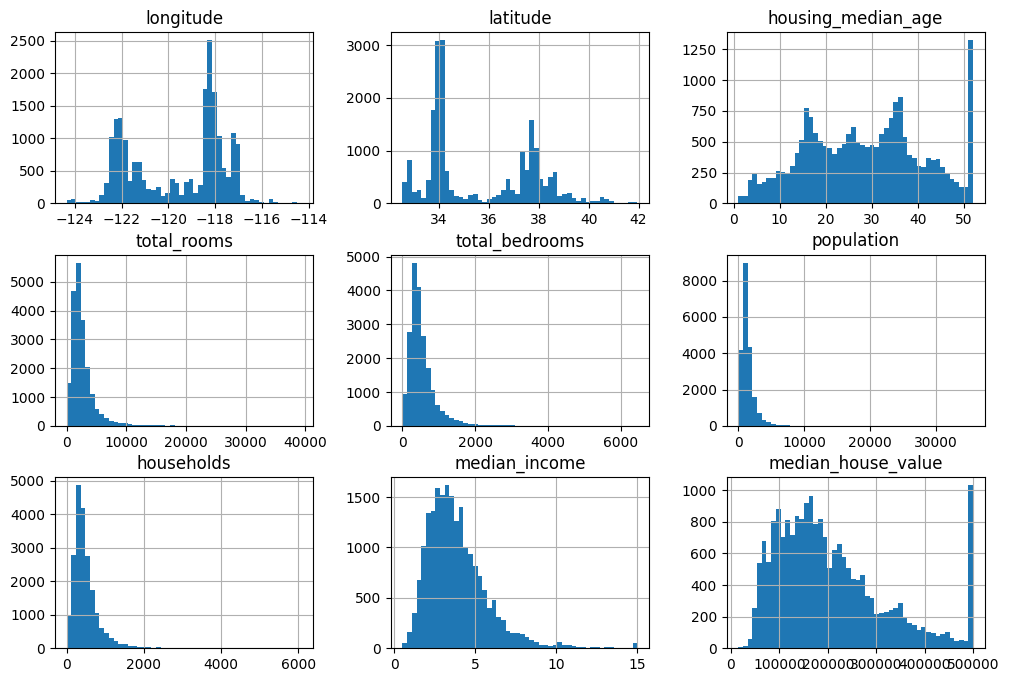

In [83]:
housing.hist(bins=50, figsize=(12, 8))

In [84]:
def shuffle_and_split_data(data, test_ratio, random_state=42):
    np.random.seed(random_state)
    shuffle_indexes = np.random.permutation(len(data))
    test_size = int(test_ratio * len(data))
    test_indexes = shuffle_indexes[:test_size]
    train_indexes = shuffle_indexes[test_size:]
    return data.iloc[train_indexes], data.iloc[test_indexes] 
    

In [85]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)

In [86]:
def is_id_in_test(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2 **32

In [87]:
def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : is_id_in_test(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [88]:
housing_with_id = housing.reset_index()
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [89]:
from sklearn.model_selection import train_test_split

train_set, train_set = train_test_split(housing, test_size=0.2, random_state=42)

### Stratified sampling

In [90]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1,2,3,4,5])


In [91]:
housing["income_cat"].describe()

count     20640
unique        5
top           3
freq       7236
Name: income_cat, dtype: int64

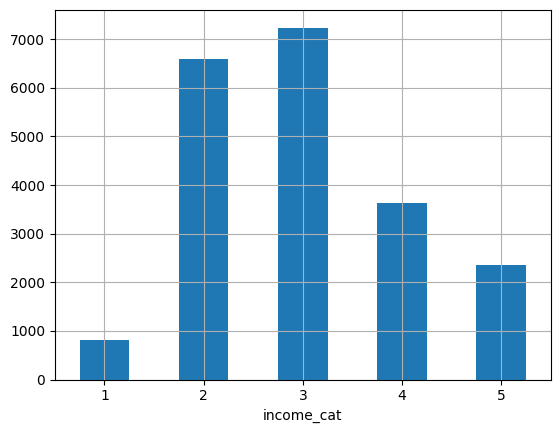

In [92]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel = "Category"
plt.ylabel = "Number of districts"

### Split

In [93]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

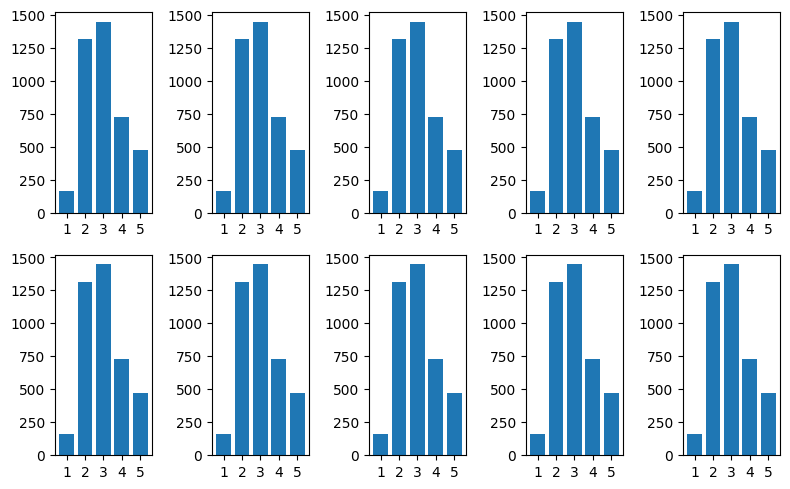

In [94]:
fig, axs = plt.subplots(nrows= 2, ncols=5,figsize=(8,5))
for i in range (10):
    strat_train_set, strat_test_set = strat_splits[i]
    count = strat_test_set["income_cat"].value_counts().sort_index()
    strat_train_set, strat_test_set = train_test_split(housing,test_size=0.2,random_state=42,stratify=housing["income_cat"])
    axs[i//5,i%5].bar(count.index.astype(str), count.values)
    plt.xlabel = "Catégorie de revenus"
    plt.ylabel = "Nombre de districts"

plt.tight_layout()
plt.show()   

In [95]:
strat_train_set = strat_train_set.drop("income_cat", axis=1)
strat_test_set = strat_test_set.drop("income_cat", axis=1)

In [96]:
housing = strat_train_set.copy()

In [97]:
len(housing)

16512

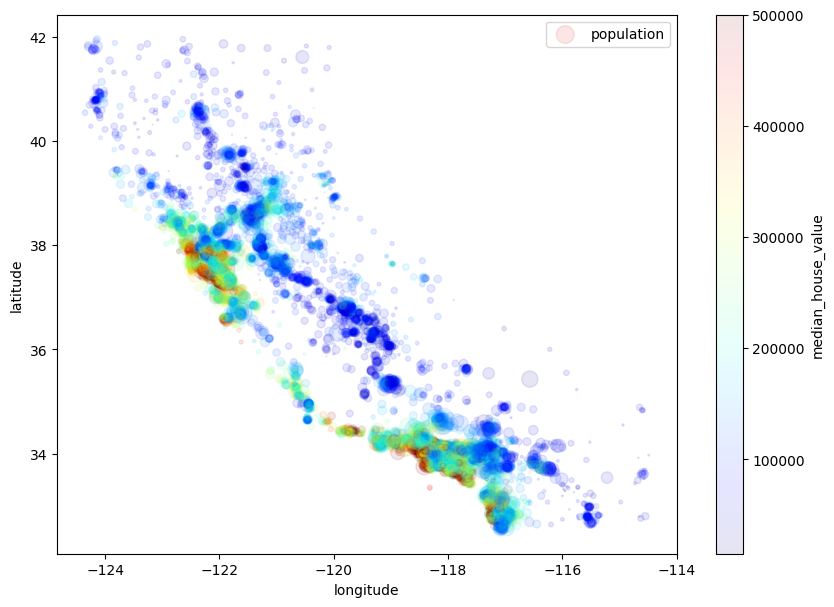

In [98]:

housing.plot(kind="scatter", x="longitude", y="latitude", grid=False, alpha=0.1, s=housing["population"]*0.02, label="population",
             c="median_house_value", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7))
plt.show()

In [99]:
housing.select_dtypes(include=["number"]).corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


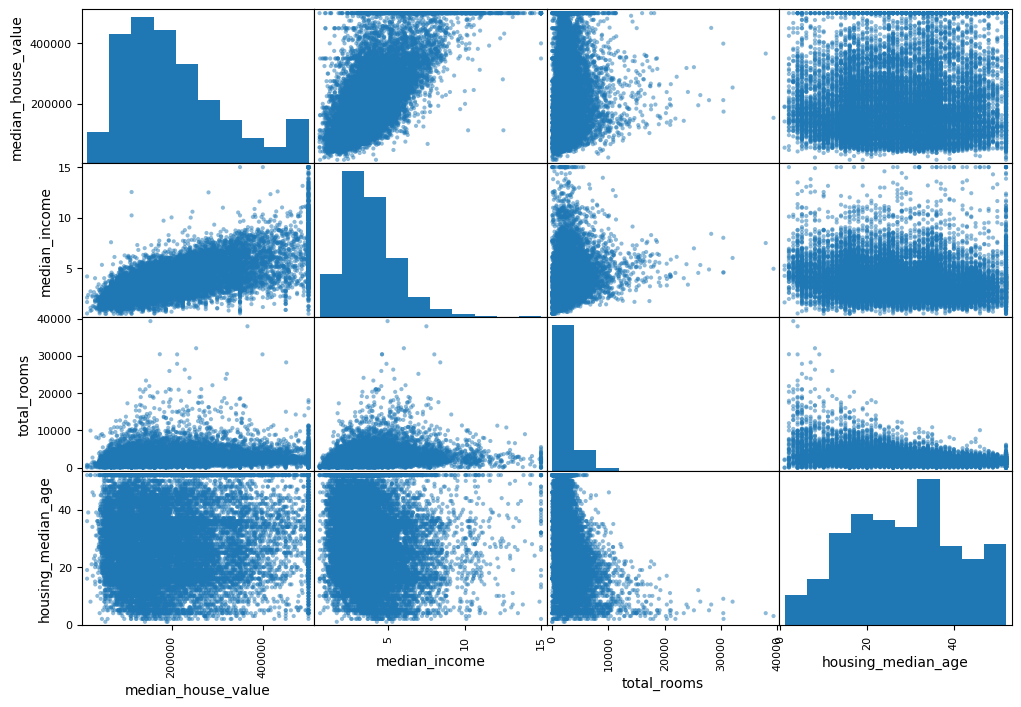

In [100]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

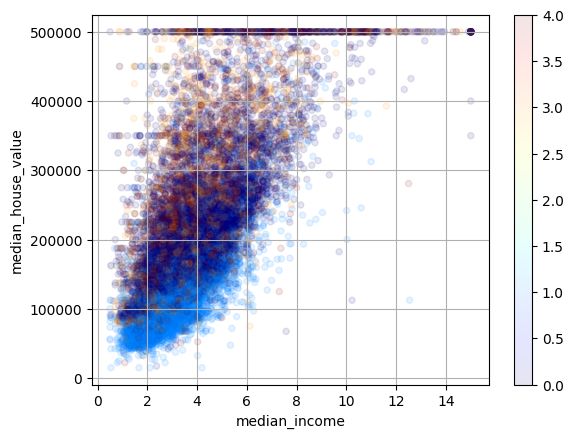

In [101]:
ocean_prox_encoded = housing["ocean_proximity"].astype("category").cat.codes
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True, c=ocean_prox_encoded, cmap="jet")
plt.show()

In [102]:
housing_labels = housing["median_house_value"].copy()
housing.drop("median_house_value",axis=1, inplace=True)

In [103]:
housing_labels

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
           ...   
14207    500001.0
13105     88800.0
19301    148800.0
19121    500001.0
19888    233300.0
Name: median_house_value, Length: 16512, dtype: float64

In [104]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.select_dtypes(include=["number"])
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [105]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [106]:
X = imputer.transform(housing_num)

In [107]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [108]:
housing_cat = strat_train_set[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN


In [109]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

### Assurer une cohérence métrique pour les fonctions d'ajustement

In [110]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], shape=(16512, 5))

In [111]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

In [112]:
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]], shape=(16512, 1))

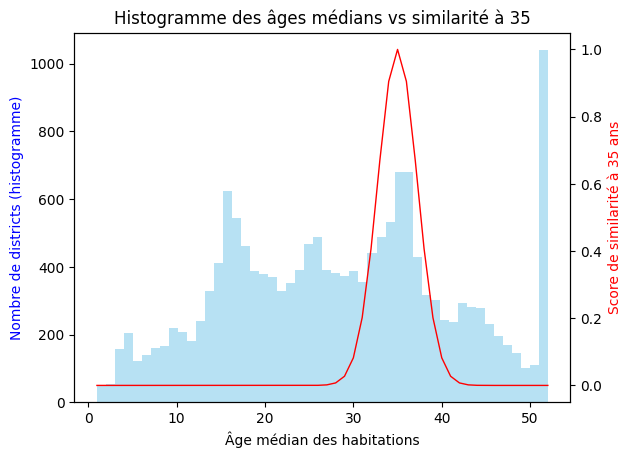

In [113]:
import numpy as np

# Tri des données par âge
sorted_indices = housing["housing_median_age"].argsort()
ages_sorted = housing["housing_median_age"].values[sorted_indices]
simil_sorted = age_simil_35[sorted_indices]

fig, ax1 = plt.subplots()

# Histogramme
ax1.hist(housing["housing_median_age"], bins=50, color='skyblue', alpha=0.6)
ax1.set_xlabel("Âge médian des habitations")
ax1.set_ylabel("Nombre de districts (histogramme)", color='blue')

# Courbe sur axe secondaire
ax2 = ax1.twinx()
ax2.plot(ages_sorted, simil_sorted, color='red', linewidth=1)
ax2.set_ylabel("Score de similarité à 35 ans", color='red')

plt.title("Histogramme des âges médians vs similarité à 35")
plt.show()

In [114]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma=gamma
        self.random_state=random_state
    def fit(self,X,y=None,sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X,sample_weight=sample_weight)
        return self
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Similiarité au cluster {i}" for i in range(self.n_clusters)]
    

In [115]:
cluster_simil = ClusterSimilarity(random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],sample_weight=housing_labels)

In [116]:
centers = cluster_simil.kmeans_.cluster_centers_
centers
similarities


array([[7.76542973e-17, 9.79800335e-01, 5.48714294e-08, ...,
        5.54756787e-01, 4.68660945e-14, 5.60181642e-01],
       [6.44368278e-01, 4.37928334e-13, 1.10563200e-01, ...,
        3.94562487e-17, 9.91430580e-01, 2.65430691e-10],
       [3.31752344e-17, 6.54513501e-01, 1.07069766e-08, ...,
        5.85660788e-01, 1.56121793e-14, 2.76994463e-01],
       ...,
       [1.20915228e-01, 2.94626804e-24, 8.21082019e-06, ...,
        9.05126434e-30, 2.27911432e-02, 2.57216447e-20],
       [6.54529515e-01, 2.83886458e-13, 1.06085724e-01, ...,
        2.31193217e-17, 9.95505588e-01, 1.85273211e-10],
       [2.52428219e-16, 9.68456695e-01, 1.35198859e-07, ...,
        4.42577246e-01, 1.42097447e-13, 6.51045403e-01]],
      shape=(16512, 10))

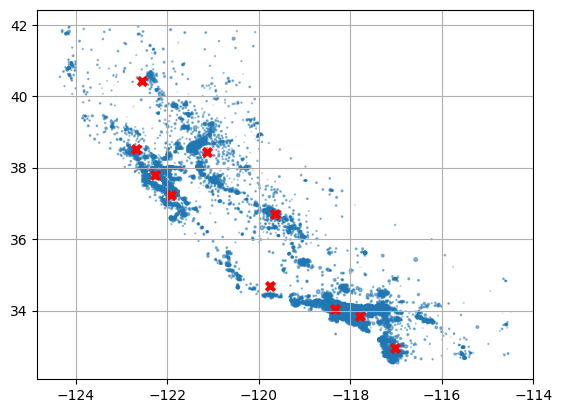

In [117]:
plt.scatter(x=housing["longitude"], y=housing["latitude"], alpha=0.5,s=housing["population"]/1000)
plt.scatter(centers[:,1],centers[:,0], marker='x',linewidths=3 ,c='red')
plt.grid(True)
plt.show()

/var/folders/k_/gyr5mvj920b9x6cgj7bvjgvh0000gn/T/ipykernel_70593/748679530.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', 10)  # 10 centroïdes → 10 couleurs


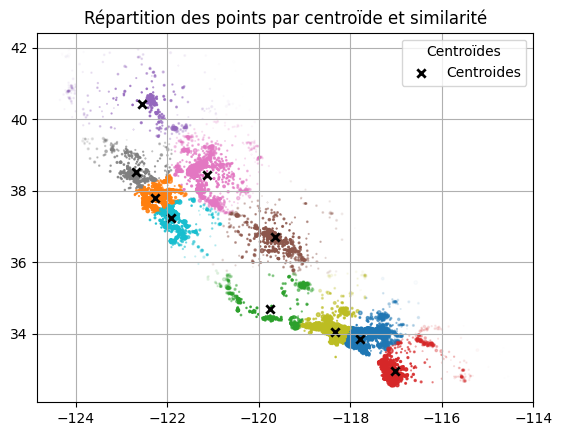

In [118]:
import matplotlib.pyplot as plt
import numpy as np

# Étape 1 : indice du centroïde le plus similaire (valeur max par ligne)
best_center = np.argmax(similarities, axis=1)  # shape: (16512,)

# Étape 2 : valeur de la similarité maximale pour chaque point
max_similarity = np.max(similarities, axis=1)  # shape: (16512,)

# Étape 3 : créer une couleur combinant cluster + intensité
# On crée une colormap avec 10 clusters, et on module l'alpha ou la couleur par similarité
from matplotlib import cm

# On utilise une colormap qualitative pour les centroïdes
colors = cm.get_cmap('tab10', 10)  # 10 centroïdes → 10 couleurs

# On prépare une liste RGBA avec intensité modulée
point_colors = [colors(c)[:3] + (sim,) for c, sim in zip(best_center, max_similarity)]

# Scatter des points
plt.figure()
plt.scatter(
    x=housing["longitude"],
    y=housing["latitude"],
    c=point_colors,
    s=housing["population"] / 1000,
    marker='o'
)

# Affichage des centroïdes
plt.scatter(
    centers[:, 1], centers[:, 0],
    marker='x', c='black', linewidths=2, label='Centroides'
)

plt.grid(True)
plt.xlabel = "Longitude"
plt.ylabel = "Latitude"
plt.title("Répartition des points par centroïde et similarité")

# Création d'une colorbar personnalisée par centroïde

plt.legend(title="Centroïdes")

plt.show()

### Mise en place du Pipeline


In [119]:
from sklearn.pipeline import Pipeline
import sklearn
sklearn.set_config(display="diagram")
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([("impute", SimpleImputer(strategy="median")),
                         ("standardize",StandardScaler()),
                         ])
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [120]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [121]:
print(housing_num_prepared.shape)

(16512, 8)


In [122]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index
)


In [123]:
df_housing_num_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [124]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
num_attribs = housing.select_dtypes(include=['number']).columns.tolist()
cat_attribs = housing.select_dtypes(include=['object', 'category']).columns.tolist()

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))

preprocesing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)

])
preprocesing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])

In [125]:
housing_prepared = preprocesing.fit_transform(housing)

In [126]:
housing_prepared = pd.DataFrame(
    housing_prepared, columns=preprocesing.get_feature_names_out(),
    index=housing.index)

housing_prepared.head()

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0


### Final Preprocessing pipeline

In [127]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_selector
def colum_ratio(X):
    return X[:, [0]] /  X[:, [1]]

def ratio_name(function_transformer, features_names_in):
    return ["ratio"]
def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(colum_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )
log_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                             FunctionTransformer(np.log, feature_names_out="one-to-one"),
                             StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=16,gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object))
],
remainder=default_num_pipeline)

In [128]:
housing_prepared = preprocessing.fit_transform(housing)

In [129]:
housing_prepared.shape

(16512, 30)

In [130]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Similiarité au cluster 0',
       'geo__Similiarité au cluster 1', 'geo__Similiarité au cluster 2',
       'geo__Similiarité au cluster 3', 'geo__Similiarité au cluster 4',
       'geo__Similiarité au cluster 5', 'geo__Similiarité au cluster 6',
       'geo__Similiarité au cluster 7', 'geo__Similiarité au cluster 8',
       'geo__Similiarité au cluster 9', 'geo__Similiarité au cluster 10',
       'geo__Similiarité au cluster 11', 'geo__Similiarité au cluster 12',
       'geo__Similiarité au cluster 13', 'geo__Similiarité au cluster 14',
       'geo__Similiarité au cluster 15', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_me

### Model selection

In [131]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x130...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(n_clusters=16,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x13036ee10>)])),
                ('linearregression', LinearRegression())])

In [132]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)

array([245500., 375700., 128200.,  99400., 322700.])

In [133]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [134]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions)
np.sqrt(lin_rmse)

np.float64(68144.47026399511)

In [135]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
forest_reg = make_pipeline(preprocessing,RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg,housing,housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [136]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     46559.471456
std       1046.199974
min      45097.134286
25%      45933.852907
50%      46668.415099
75%      46907.322574
max      48771.847451
dtype: float64

In [137]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
]
)
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]}
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x13036ee10>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [138]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [139]:
final_model = grid_search.best_estimator_

In [140]:
final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x1303f4d...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1274d4710>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

In [141]:
features_importances = final_model["random_forest"].feature_importances_
features_importances = features_importances.round(2)

In [142]:
features_importances

array([0.07, 0.05, 0.07, 0.01, 0.01, 0.01, 0.01, 0.25, 0.03, 0.03, 0.04,
       0.02, 0.03, 0.04, 0.02, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03,
       0.02, 0.01, 0.11, 0.  , 0.  , 0.01, 0.02])

In [143]:
sorted(zip(features_importances, final_model["preprocessing"].get_feature_names_out()))

[(np.float64(0.0), 'cat__ocean_proximity_ISLAND'),
 (np.float64(0.0), 'cat__ocean_proximity_NEAR BAY'),
 (np.float64(0.01), 'cat__ocean_proximity_<1H OCEAN'),
 (np.float64(0.01), 'cat__ocean_proximity_NEAR OCEAN'),
 (np.float64(0.01), 'log__households'),
 (np.float64(0.01), 'log__population'),
 (np.float64(0.01), 'log__total_bedrooms'),
 (np.float64(0.01), 'log__total_rooms'),
 (np.float64(0.02), 'geo__Similiarité au cluster 10'),
 (np.float64(0.02), 'geo__Similiarité au cluster 11'),
 (np.float64(0.02), 'geo__Similiarité au cluster 12'),
 (np.float64(0.02), 'geo__Similiarité au cluster 14'),
 (np.float64(0.02), 'geo__Similiarité au cluster 3'),
 (np.float64(0.02), 'geo__Similiarité au cluster 6'),
 (np.float64(0.02), 'geo__Similiarité au cluster 8'),
 (np.float64(0.02), 'geo__Similiarité au cluster 9'),
 (np.float64(0.02), 'remainder__housing_median_age'),
 (np.float64(0.03), 'geo__Similiarité au cluster 0'),
 (np.float64(0.03), 'geo__Similiarité au cluster 1'),
 (np.float64(0.03), 'g

In [144]:
X = strat_test_set.drop("median_house_value", axis=1)
y = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X)
final_rmse = mean_squared_error(y, final_predictions)
print(np.sqrt(final_rmse))

42883.1031673268


In [145]:
final_model.score(X,y)

0.862620219512922

In [146]:
import joblib
joblib.dump(final_model, "california_housing_model.pkl")

['california_housing_model.pkl']